# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to download data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

haberman

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


### Here,our objective of this analysis to predict the survival status of patients with given features: age,year,lymph nodes
### Class Label: status
### 1 ==> means that a  patient survied 5 years or longer
### 2 ==> means that a  patient died within 5 years

In [6]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

## Observations:

###  It is evident that the number of patients who survived 5 years or longer are more than the number of patients who died within 5 years

In [33]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

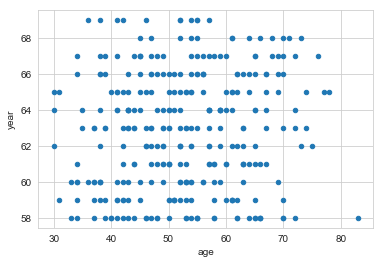

In [34]:
#2-D Scatter-Plot

haberman.plot(kind='scatter', x='age', y='year') ;
plt.show()

C:\Users\Vikram\Miniconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


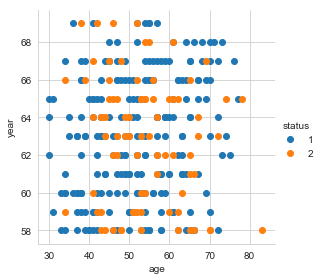

In [37]:
#2-D Scatter plot with color coding for each class

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();


### From the above 2D scatter-plot it is difficult to distinguish between the two classes as there is a lot of overlapping between the two and there is no clear separability

C:\Users\Vikram\Miniconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Vikram\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Vikram\Miniconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Vikram\Miniconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


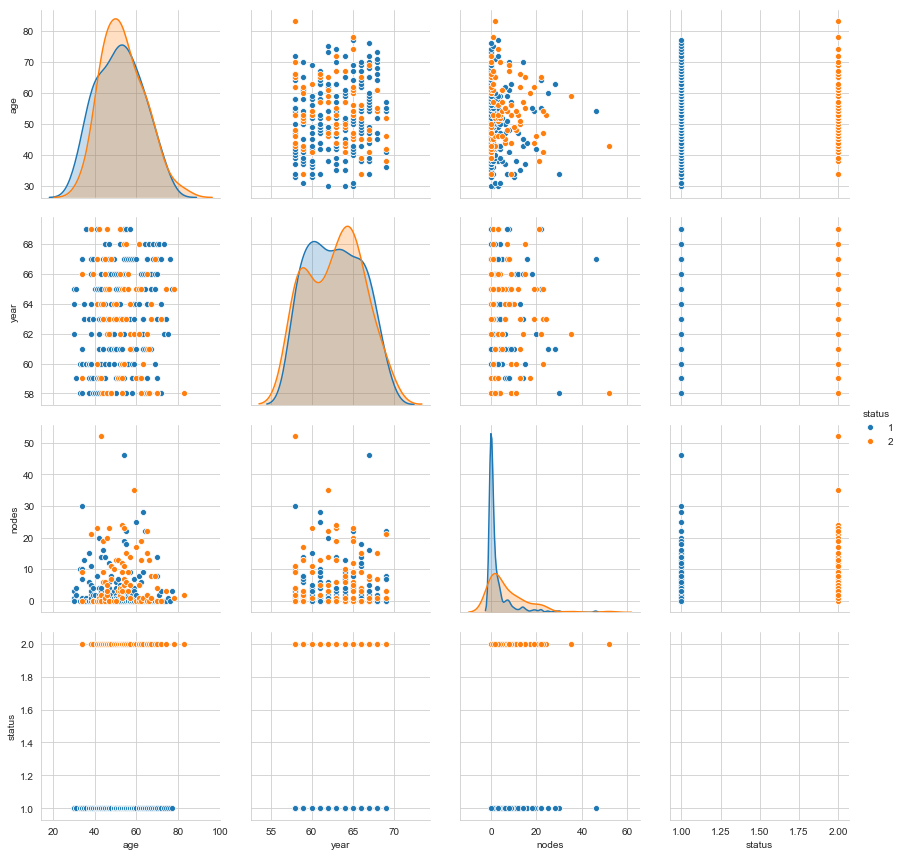

In [38]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3);
plt.show()

# Univariate Analysis

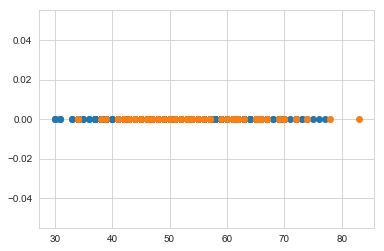

In [39]:
import numpy as np
survived=haberman.loc[haberman["status"] == 1]
died=haberman.loc[haberman["status"] == 2]
plt.plot(survived['age'],np.zeros_like(survived['age']),'o')
plt.plot(died['age'],np.zeros_like(died['age']),'o')
plt.show()

### Observations:
### There seems to be some separablity,but there is also a lot of overlapping between the two classes
### So it is tough to predict a patients survival status based on age>33 and age<78

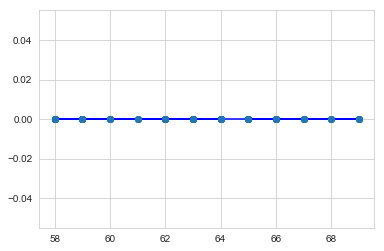

In [40]:
import numpy as np
survived=haberman.loc[haberman["status"] == 1]
died=haberman.loc[haberman["status"] == 2]
plt.plot(survived['year'],np.zeros_like(survived['age']),'b')
plt.plot(died['year'],np.zeros_like(died['age']),'o')
plt.show()

## Observations:

### There seems to be only one class that is visible on the graph. 
### So this feature cannot be used to a patient's survival status  based on year of operation

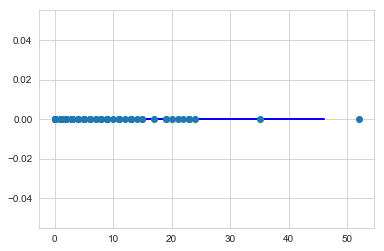

In [41]:
import numpy as np
survived=haberman.loc[haberman["status"] == 1]
died=haberman.loc[haberman["status"] == 2]
plt.plot(survived['nodes'],np.zeros_like(survived['age']),'b')
plt.plot(died['nodes'],np.zeros_like(died['age']),'o')
plt.show()

## Observations:
### If Number of positive auxillary nodes > 35: then the patient died

C:\Users\Vikram\Miniconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Vikram\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


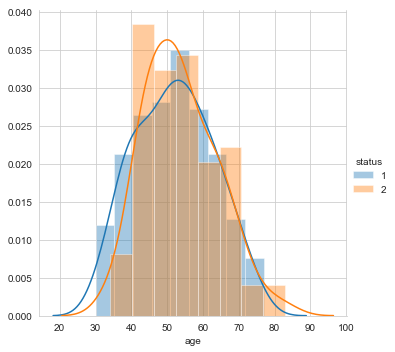

In [42]:
sns.FacetGrid(haberman,hue='status',size=5)\
   .map(sns.distplot,'age')\
   .add_legend()
plt.show();

## Observations:

### The distributions of datapoints belonging to class 1 and class 2 are overlapping

C:\Users\Vikram\Miniconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Vikram\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


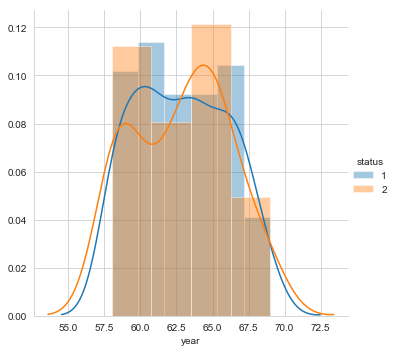

In [43]:
sns.FacetGrid(haberman,hue='status',size=5)\
   .map(sns.distplot,'year')\
   .add_legend()
plt.show();

## Observations:

### The distributions of datapoints belonging to class 1 and class 2 are overlapping

C:\Users\Vikram\Miniconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Vikram\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


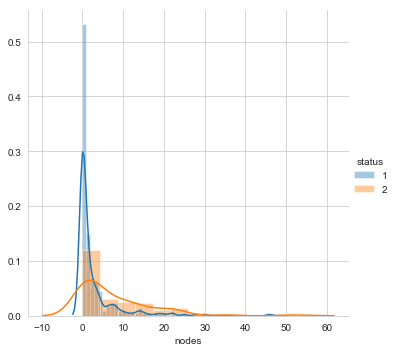

In [44]:
sns.FacetGrid(haberman,hue='status',size=5)\
   .map(sns.distplot,'nodes')\
   .add_legend()
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


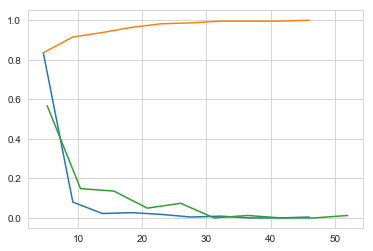

In [47]:
counts, bin_edges = np.histogram(survived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(died['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


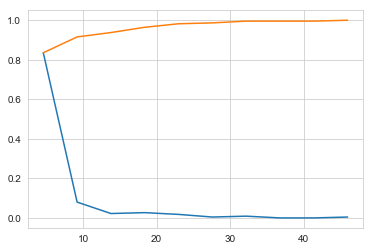

In [48]:
counts, bin_edges = np.histogram(survived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

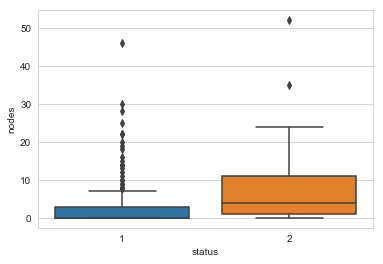

In [49]:
#Box-Plot

sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

C:\Users\Vikram\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


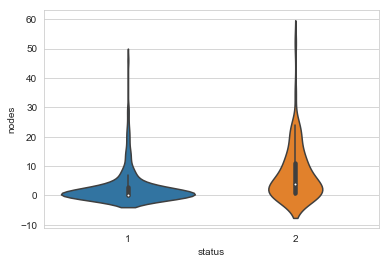

In [50]:
#Violin-plot
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

# Bi-Variate Analysis

C:\Users\Vikram\Miniconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


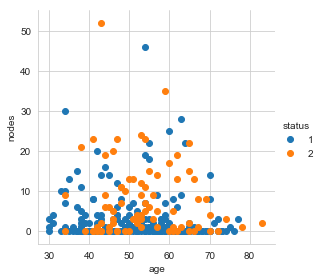

In [51]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='status',size=4).map(plt.scatter,'age','nodes').add_legend()
plt.show()

C:\Users\Vikram\Miniconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


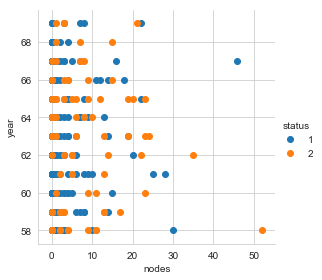

In [52]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='status',size=4).map(plt.scatter,'nodes','year').add_legend()
plt.show()

C:\Users\Vikram\Miniconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


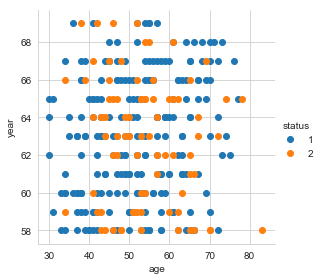

In [53]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='status',size=4).map(plt.scatter,'age','year').add_legend()
plt.show()
